In [ ]:
import requests

mrturl = "https://jakartamrt.co.id/id/val/stasiuns"

opener = requests.get(mrturl)

In [ ]:
data = opener.json()

total = len(data)

total

13

In [ ]:
sample = data[6]

sample.keys()

dict_keys(['nid', 'title', 'urutan', 'isbig', 'path', 'catatan', 'antarmodas', 'peta_lokalitas', 'jadwal_lb_biasa', 'jadwal_lb_libur', 'jadwal_hi_biasa', 'jadwal_hi_libur', 'banner', 'retails', 'estimasi', 'fasilitas'])

In [ ]:
title = sample["title"]

title

'Stasiun ASEAN'

In [ ]:
antar = sample["antarmodas"]

antar

'Kopaja\r\nS13\r\n\r\nMayasari Bakti\r\nC300'

In [ ]:
split = "\r\n\r\n"

antar = antar.split(split)

antar

['Kopaja\r\nS13', 'Mayasari Bakti\r\nC300']

In [ ]:
repl = "\r\n"

antar = [i.replace(repl, " ") for i in antar]

antar

['Kopaja S13', 'Mayasari Bakti C300']

In [ ]:
jadnor = sample["jadwal_lb_biasa"]

jadnor = [i.strip() for i in jadnor.split(",")]

jadnor[:5]

['05:19', '05:34', '05:46', '05:58', '06:10']

In [ ]:
jadoff = sample["jadwal_lb_libur"]

jadoff = [i.strip() for i in jadoff.split(",")]

jadoff[:5]

['05:19', '05:34', '05:46', '05:58', '06:10']

In [ ]:
selisih = len(jadnor) - len(jadoff)

selisih

33

In [ ]:
jadnor = sample["jadwal_hi_biasa"]

jadnor = [i.strip() for i in jadnor.split(",")]

jadnor[:5]

['05:02', '05:15', '05:27', '05:39', '05:51']

In [ ]:
jadoff = sample["jadwal_hi_libur"]

jadoff = [i.strip() for i in jadoff.split(",")]

jadoff[:5]

['05:02', '05:14', '05:26', '05:38', '05:50']

In [ ]:
selisih = len(jadnor) - len(jadoff)

selisih

34

In [ ]:
retail = sample["retails"]

retail

[{'nid': '1222',
  'title': 'di.bawahtangga',
  'jenis_retail': 'retail ',
  'cover': 'https://jakartamrt.co.id/sites/default/files/2023-09/6CCB4D18-9DB6-4F4E-A287-D179DEE9F313_1_201_a.jpeg',
  'path': '/id/retail/dibawahtangga'}]

In [ ]:
support = sample["fasilitas"]

support

[{'nid': '274',
  'title': 'Sare Hotel',
  'jenis_fasilitas': 'Penginapan',
  'cover': 'https://jakartamrt.co.id/sites/default/files/2020-10/sare-hotel.jpg',
  'path': '/id/fasilitas/sare-hotel'},
 {'nid': '273',
  'title': 'Oeang Restaurant Roastery and Bar',
  'jenis_fasilitas': 'Restoran',
  'cover': 'https://jakartamrt.co.id/sites/default/files/2020-10/oeang-mbloc.png',
  'path': '/id/fasilitas/oeang-restaurant-roastery-and-bar'}]

In [ ]:
perjalanan = sample["estimasi"]

perjalanan

[{'stasiun_nid': '20', 'tarif': '9000', 'waktu': '15'},
 {'stasiun_nid': '21', 'tarif': '7000', 'waktu': '12'},
 {'stasiun_nid': '29', 'tarif': '6000', 'waktu': '9'},
 {'stasiun_nid': '30', 'tarif': '5000', 'waktu': '7'},
 {'stasiun_nid': '31', 'tarif': '4000', 'waktu': '5'},
 {'stasiun_nid': '32', 'tarif': '3000', 'waktu': '2'},
 {'stasiun_nid': '34', 'tarif': '3000', 'waktu': '2'},
 {'stasiun_nid': '35', 'tarif': '4000', 'waktu': '4'},
 {'stasiun_nid': '36', 'tarif': '5000', 'waktu': '7'},
 {'stasiun_nid': '37', 'tarif': '6000', 'waktu': '9'},
 {'stasiun_nid': '38', 'tarif': '7000', 'waktu': '11'},
 {'stasiun_nid': '39', 'tarif': '7000', 'waktu': '14'}]

### ```General```

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

### QnA 1

```Total Retail Seluruh Statiun MRT ?```

In [ ]:
retailer = {"Umkm":0, "Atm":0, "Retail":0, "Fashion":0, "Makanan":0, "Mesin Top Up":0, "Vending Machine":0, "Unclass":0}

for i in range(total):

  sample = data[i]

  retail = sample["retails"]

  for ret in retail:

    jenis = ret["jenis_retail"]

    if not jenis: jenis = "Unclass"

    jenis = [i.capitalize() for i in jenis.strip().split(" ")]

    jenis = " ".join(jenis)

    if jenis == "Fesyen": jenis = "Fashion"

    if jenis in retailer.keys():
      retailer[jenis] += 1
    else:
      retailer[jenis] = 1

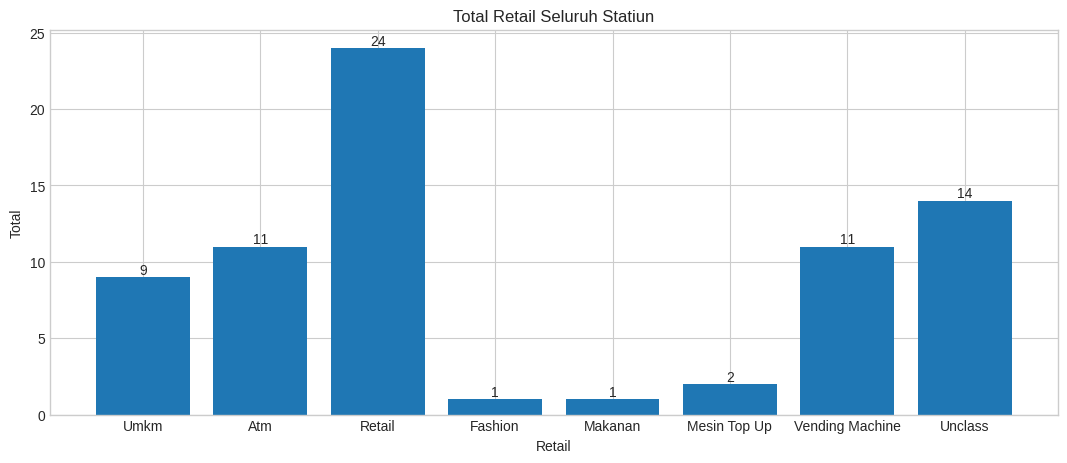

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))

ax.bar(retailer.keys(), retailer.values())

ax.set_title("Total Retail Seluruh Statiun")

ax.set_xlabel("Retail")

ax.set_ylabel("Total")

ax.bar_label(ax.containers[0]);

```Terdapat Total 73 Retail / Fasilitas Dalam Statiun```  
```Dengan 4 Teratas :  Retail (Toko) Sebanyak 24, Unclass (Jenis Tak Diketahui) : 14, ATM : 11 dan Vending Machine : 11```

In [ ]:
total_retail = 0

for i, t in retailer.items():
  total_retail += t

total_retail

73

### QnA 2

```Total Fasilitas Seluruh Statiun MRT ?```

In [ ]:
support = {}

for i in range(total):

  sample = data[i]

  supporting = sample["fasilitas"]

  for sup in supporting:

    jenis = sup["jenis_fasilitas"]

    jenis = [t.capitalize() for t in jenis.strip().split(" ")]

    jenis = " ".join(jenis)

    if jenis in support.keys():
      support[jenis] += 1
    else:
      support[jenis] = 1

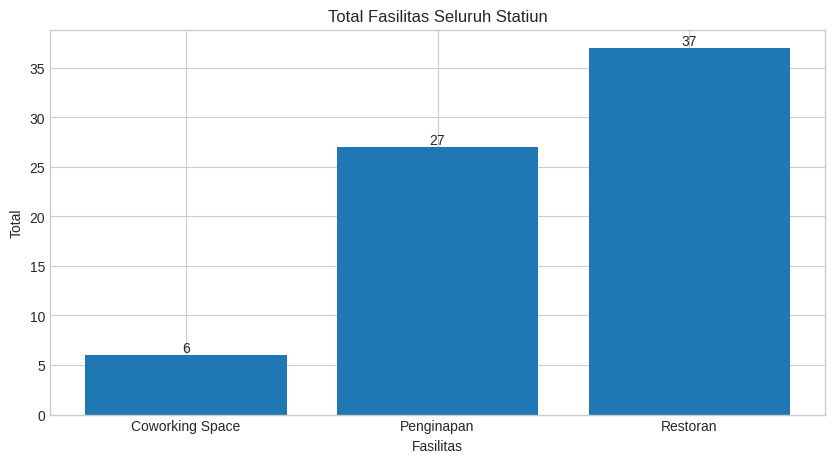

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(support.keys(), support.values())

ax.set_title("Total Fasilitas Seluruh Statiun")

ax.set_xlabel("Fasilitas")

ax.set_ylabel("Total")

ax.bar_label(ax.containers[0]);

In [ ]:
total_support = 0

for i, t  in support.items():
  total_support += t

total_support

70

```Terdapat Total 70 Fasilitas, Dengan Restoran Sebanyak 37, Penginapan : 27, dan Coworking Space : 6```

### QnA 3

```Berapa Rata-Rata Selisih Total Perjalanan Selama Hari Biasa dan Hari Libur ?```

In [ ]:
def jadtelp(sample):
  if not sample: return []
  sample = sample.split(",")
  sample = [i.strip() for i in sample]
  return sample

In [ ]:
perjalanan = {"biasa":[], "libur":[], "selisih":[]}

for i in range(total):

  sample = data[i]

  biasa = sample["jadwal_hi_biasa"]

  biasa = len(jadtelp(biasa))

  libur = sample["jadwal_hi_libur"]

  libur = len(jadtelp(libur))

  selisih = biasa - libur

  perjalanan["biasa"].append(biasa)

  perjalanan["libur"].append(libur)

  perjalanan["selisih"].append(selisih)

perjalanan

{'biasa': [142, 142, 142, 142, 142, 142, 143, 147, 142, 142, 144, 143, 0],
 'libur': [109, 109, 109, 109, 108, 110, 109, 109, 109, 108, 109, 109, 0],
 'selisih': [33, 33, 33, 33, 34, 32, 34, 38, 33, 34, 35, 34, 0]}

In [ ]:
import numpy

bundaran = {"biasa":int(numpy.mean(perjalanan["biasa"])),
            "libur":int(numpy.mean(perjalanan["libur"])),
            "selisih":int(numpy.mean(perjalanan["selisih"]))}

bundaran

{'biasa': 131, 'libur': 100, 'selisih': 31}

In [ ]:
perjalanan = {"biasa":[], "libur":[], "selisih":[]}

for i in range(total):

  sample = data[i]

  biasa = sample["jadwal_lb_biasa"]

  biasa = len(jadtelp(biasa))

  libur = sample["jadwal_lb_libur"]

  libur = len(jadtelp(libur))

  selisih = biasa - libur

  perjalanan["biasa"].append(biasa)

  perjalanan["libur"].append(libur)

  perjalanan["selisih"].append(selisih)

perjalanan

{'biasa': [0, 143, 142, 142, 141, 140, 142, 142, 141, 139, 142, 143, 142],
 'libur': [0, 109, 109, 108, 109, 109, 109, 108, 109, 108, 108, 109, 109],
 'selisih': [0, 34, 33, 34, 32, 31, 33, 34, 32, 31, 34, 34, 33]}

In [ ]:
import numpy

lebak = {"biasa":int(numpy.mean(perjalanan["biasa"])),
         "libur":int(numpy.mean(perjalanan["libur"])),
         "selisih":int(numpy.mean(perjalanan["selisih"]))}

lebak

{'biasa': 130, 'libur': 100, 'selisih': 30}

```Selisih Perjalanan Antara Hari Libur dan Hari Biasa Adalah 30```  
```Hal ini Didukung Dengan Rata-Rata Perjalanan Hari Biasa : 130, dan Hari Libur : 100```

### QnA 4

```Berapa Menit Durasi Terlama, Tercepat dan Biaya Termahal, Termurah ? ```

In [ ]:
timer = []

tarif = []

for i in range(total):

  sample = data[i]

  perjalanan = sample["estimasi"]

  for jalan in perjalanan:

    j, t = int(jalan["waktu"]), int(jalan["tarif"])

    if j not in timer: timer.append(j)

    if t not in tarif: tarif.append(t)

In [ ]:
perjalanan_termurah = min(tarif)

perjalanan_termurah

3000

In [ ]:
perjalanan_termahal = max(tarif)

perjalanan_termahal

14000

In [ ]:
perjalanan_tercepat = min(timer)

perjalanan_tercepat

2

In [ ]:
perjalanan_terlama = max(timer)

perjalanan_terlama

29

```Perjalanan Termahal : Rp. 14.000, Termurah : Rp. 3.000```  
```Perjalanan Tercepat : 2 Menit, Terlama : 29 Menit```